<a href="https://colab.research.google.com/github/kimdonggyu2008/deep_daiv_-/blob/main/24su_audio_%EA%B9%80%EB%8F%99%EA%B7%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #드라이브를 연동하기 위한 코드로 https://jimmy-ai.tistory.com/14 에서 더 자세한 정보를 찾아볼 수 있다.
from google.colab import output
drive.mount("/content/gdrive")
import os #operation system의 줄임말로 데이터 디렉토리를 확인하는 등 작업을 수행할 수 있다.


m_path = "/content/drive/MyDrive/코딩공부/deep_daiv/dataset"

Mounted at /content/gdrive


In [ ]:
import os
import matplotlib.pyplot as plt
import librosa,librosa.display
import IPython.display as ipd

In [ ]:
BASE_FOLDER="/content/gdrive/MyDrive/코딩공부/deep_daiv/dataset"
speech_1 = "speech_1.wav"
speech_2 = "speech_2.wav"

In [ ]:
speech_1_audio,_=librosa.load(os.path.join(BASE_FOLDER,speech_1),sr=12000)
speech_2_audio,_=librosa.load(os.path.join(BASE_FOLDER,speech_2),sr=12000)

1.1 speech_1 오디오 데이터를 다운받은 뒤 librosa 패키지를 가지고 해당
오디오 데이터를 읽어주세요. (단, sampling rate은 초당 12kHz으로
설정하시면 됩니다.)

In [ ]:
ipd.Audio(os.path.join(BASE_FOLDER, speech_1))


In [ ]:
ipd.Audio(os.path.join(BASE_FOLDER, speech_2))

In [ ]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()




 1.2 speech_1,speech_2 데이터를 MelSpectrogram으로 시각화하세요

<ipython-input-15-2ed070d1ccbb>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal))


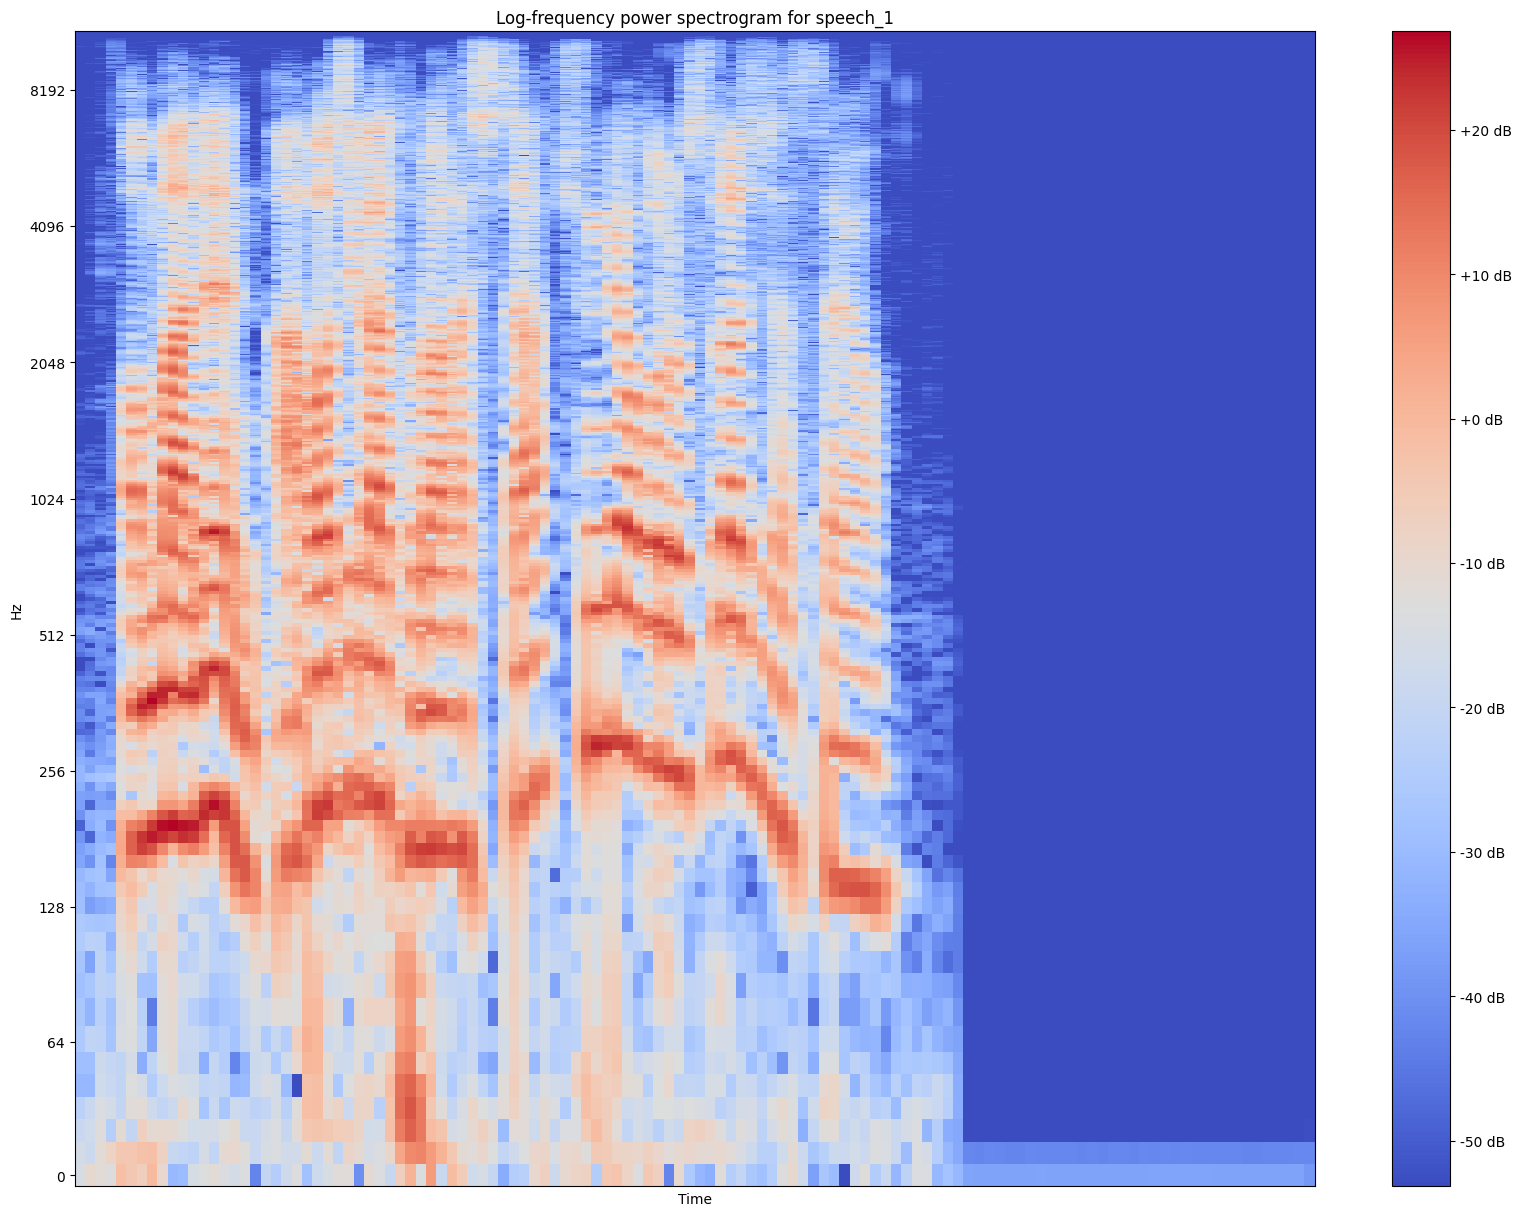

In [ ]:
plot_spectrogram(speech_1_audio,"speech_1")

<ipython-input-15-2ed070d1ccbb>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal))


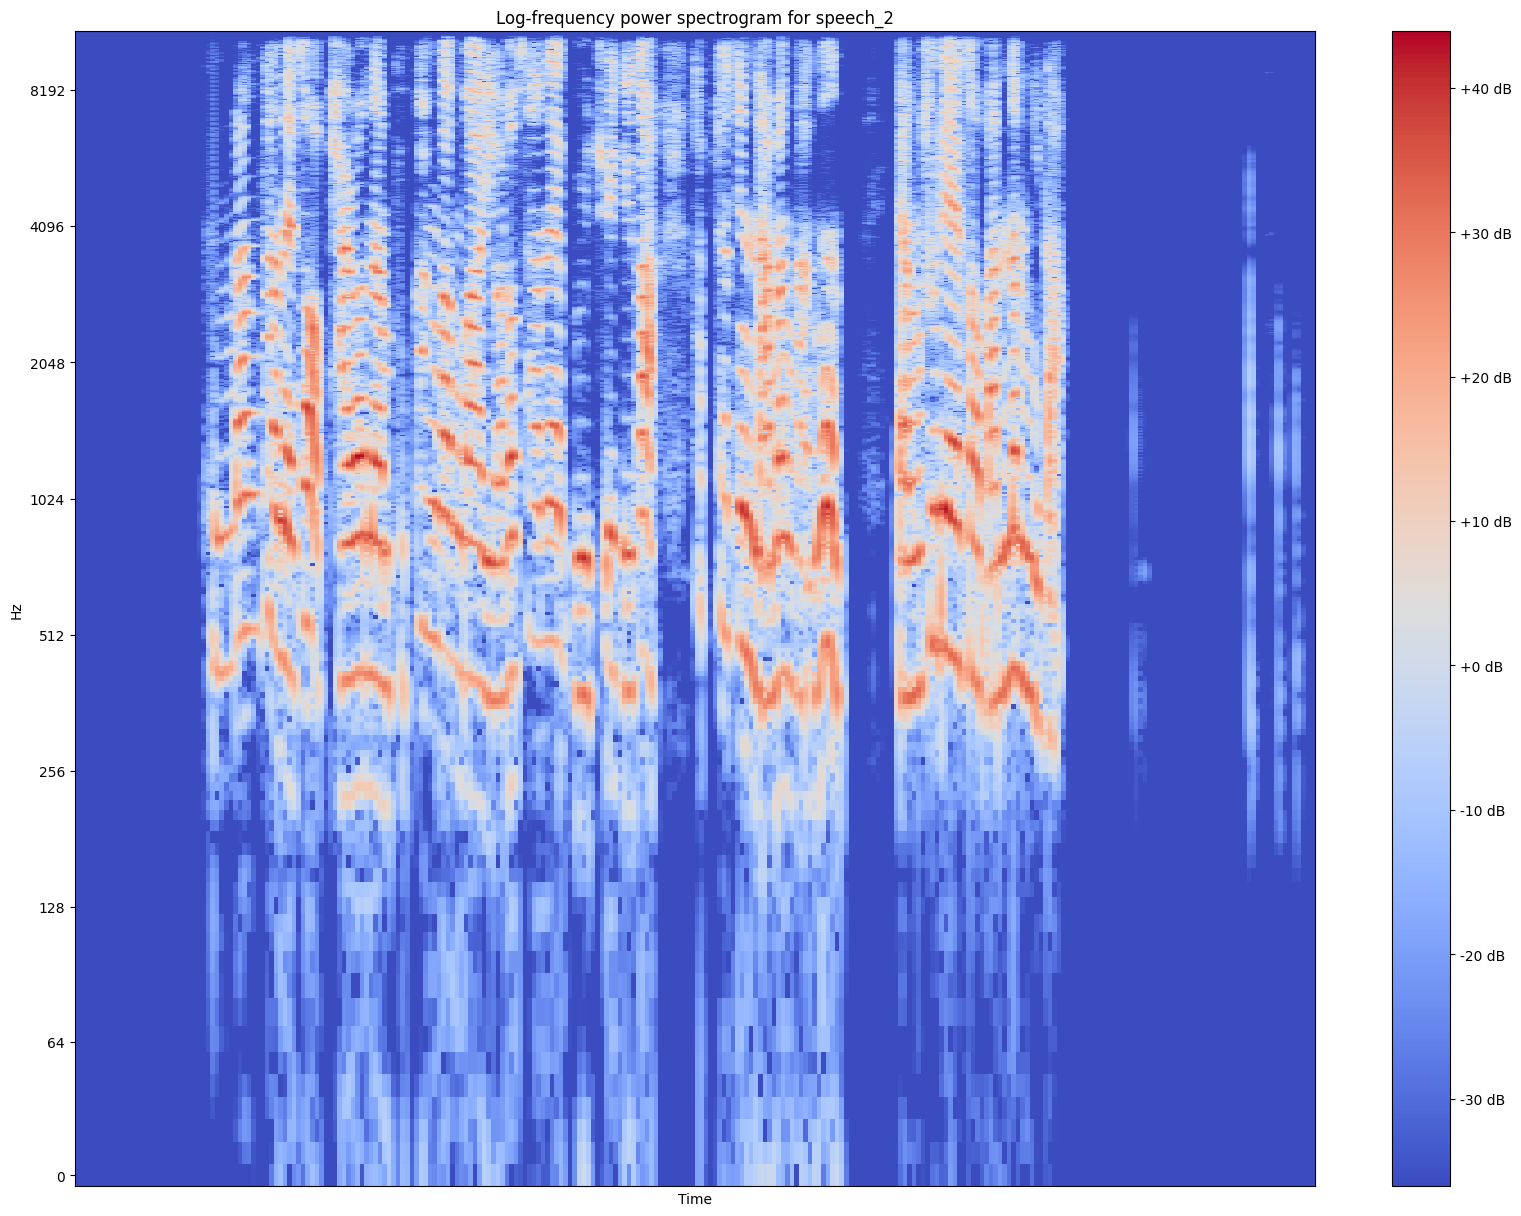

In [ ]:
plot_spectrogram(speech_2_audio,"speech_2")

1.3
1차원 시계열인 파형 (Waveform) 형태의 오디오 데이터 y 는 고속 푸리에
변환 (Short Time Fourier Transform)을 거친 특징값을 멜 필터뱅크 (Mel
Filterbank)와 내적해 2차원 시간-주파수 차원의 멜 필터뱅크로 만들 수 있습니다. 이
과정은 아래의 수식으로 표현할 수 있습니다

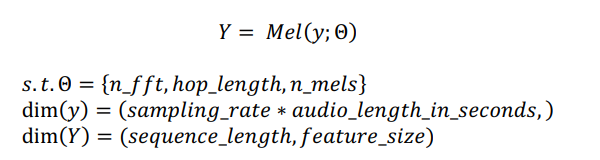

위의 Θ 로 작성한 하이퍼파라미터들 중에서 STFT의 결과인  Y 의
sequence_length 를 결정하는 하이퍼파라미터를 모두 골라주세요. (기타. 하이퍼파라미터는 모두 변하지 않는다고 가정합니다)

1. n_fft = 주어진 샘플을 n_fft개로 나누고, 아래 hop_length과 연관이 있으므로 영향을 줌.

2. hop_length = 샘플링 윈도우의 이동 거리가 hop_length에 의해서 정의되어 겹치는 비율이 달라짐. 윈도우의 이동거리가 짧아지면 겹치는 비율이 높아져 더 많은 프레임이 생성됨. 최종적으로 sequence_length가 더 길어짐


2.
기계학습 수업에서 그동안 배운 내용을 활용해 원하는 주제로 프로젝트를 진행하게 된 적이 있습니다. 저는 그동안 관심을 가지고 있던 소리를 주제로 정했고, 주어진 음성의 감정을 인식하는 감정 인식 모델 프로젝트를 진행하게 되었습니다.

우선, 프로젝트 진행을 위해 인터넷에서 RAVDESS, TESS라는 오픈 데이터셋을 사용했습니다. 하지만, 데이터의 갯수가 적었기에 각각의 샘플에 노이즈, 피치 시프트, 길이 조정등의 어그멘테이션을 통해 데이터의 갯수를 늘렸습니다.

감정을 분류하는 가장 대표적인 방법인 STFT와 멜 스펙트로그램을 활용하기 위해 librosa 라이브러리를 활용했고, 강한 어조 여부를 확인하기 위해서 zcr의 함수를 직접 만들었습니다.

모델은 샘플 wav파일을 멜 스펙트로그램으로 변환한 후, 1D 컨볼루션 네트워크를 활용해 순차적으로 특징을 추출해 학습을 시켰습니다.

모델에는 드롭아웃을 적용해 데이터셋에 대한 과적합을 방지했고, 소프트 맥스 함수를 통해 8개로 감정으로 분류시켰습니다.

최종적으로 주어진 음성에 대해 약 80%의 정확도를 가지는 감정 인식 모델을 완성할 수 있었고, 기계학습에 있어 데이터셋과 학습에 사용되는 요소들의 중요성을 배울 수 있었습니다.

3-1. 제거하면 안된다고 생각합니다.
transformer모델은 어텐션을 활용해 각 토큰의 중요도를 동시에 추출하는 대신, 순서의 영향을 받지 않습니다. 이에 positional embedding을 활용해 데이터의 순서를 유지하고 있습니다.
RNN모델은 순차적으로 데이터를 입력받는 대신, 이전 데이터를 계속 활용하기에 위치 정보가 유지될 수 있습니다.
따라서 TRANSFORMER모델을 RNN모델로 변경한다면, 주어진 데이터의 순서를 별도로 추가해야한다고 생각합니다.

3-2. 일반적인 특징 추출 자체로는 CNN이 가장 적합하다고 생각합니다. 시간-주파수 평면 기준에서 봤을때, 각 픽셀의 값을 통해 데이터의 해당 시간, 주파수의 특징을 추출해낼 수 있다고 생각합니다.

RNN은 시간에 의존하는 특징을 추출하는 것에 의의가 있기에 음성 자체의 특징을 추출하기에는 적합하지 않다고 생각합니다.

TRANSFORMER또한 전체적인 특징을 추출할때는 가장 효율이 좋지만, 복잡성이 높고 특징이 positional embedding의 영향을 받기에 단순 특징 추출에는 과하다고 생각합니다.